# MODELIZACIÓN PARA NO SUPERVISADO

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de k a testar
* Reducir el número de repeticiones de n_init

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [5]:
ruta_proyecto = 'C:/Users/User/Desktop/DS4B/03_MACHINE_LEARNING/08_CASOS/01_leadScoring'

Nombres de los ficheros de datos.

In [6]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [40]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4812 entries, 660737 to 579533
Data columns (total 43 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   origen_API                                4812 non-null   float64
 1   origen_Landing Page Submission            4812 non-null   float64
 2   origen_Lead Add Form                      4812 non-null   float64
 3   origen_OTROS                              4812 non-null   float64
 4   fuente_Chat                               4812 non-null   float64
 5   fuente_Direct Traffic                     4812 non-null   float64
 6   fuente_Google                             4812 non-null   float64
 7   fuente_OTROS                              4812 non-null   float64
 8   fuente_Organic Search                     4812 non-null   float64
 9   fuente_Reference                          4812 non-null   float64
 10  ult_actividad_Chat Conversation   

In [42]:
df.drop(columns=
        ['paginas_vistas_visita_mms',
        'visitas_total_mms',
        'descarga_lm_Yes',
        'descarga_lm_No',
        'score_perfil_mms',
        'score_actividad_mms',
        'fuente_Chat',
        'fuente_Direct Traffic',
        'fuente_Google',
        'fuente_OTROS',
        'fuente_Organic Search',
        'fuente_Reference',
        'ambito_Banking, Investment And Insurance',
        'ambito_Business Administration',
        'ambito_Finance Management',
        'ambito_Healthcare Management',
        'ambito_Human Resource Management',
        'ambito_IT Projects Management',
        'ambito_International Business',
        'ambito_Marketing Management',
        'ambito_Media and Advertising',
        'ambito_OTROS',
        'ambito_Operations Management',
        'ambito_Select',
        'ambito_Supply Chain Management',
        'ambito_Travel and Tourism'], inplace=True)

In [43]:
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,ult_actividad_Chat Conversation,ult_actividad_Converted to Lead,ult_actividad_Email Link Clicked,ult_actividad_Email Opened,ult_actividad_OTROS,ult_actividad_Page Visited on Website,ult_actividad_SMS Sent,ocupacion_OTROS,ocupacion_Student,ocupacion_Unemployed,ocupacion_Working Professional,tiempo_en_site_total_mms,compra
id,,,,,,,,,,,,,,,,,
660737,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0
660681,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.63,1
660673,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.72,1
660664,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0
660624,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579701,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.38,0
579622,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.62,1
579615,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.09,1


## MODELIZAR

### Crear el espacio de soluciones

In [44]:
min_k = 3
max_k = 7

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [45]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [46]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [47]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,5241.43,0.29,1405.95,1.51
4,4597.16,0.31,1293.05,1.35
5,4217.74,0.32,1164.91,1.51
6,3745.96,0.38,1170.14,1.40


#### Analizar los gráficos

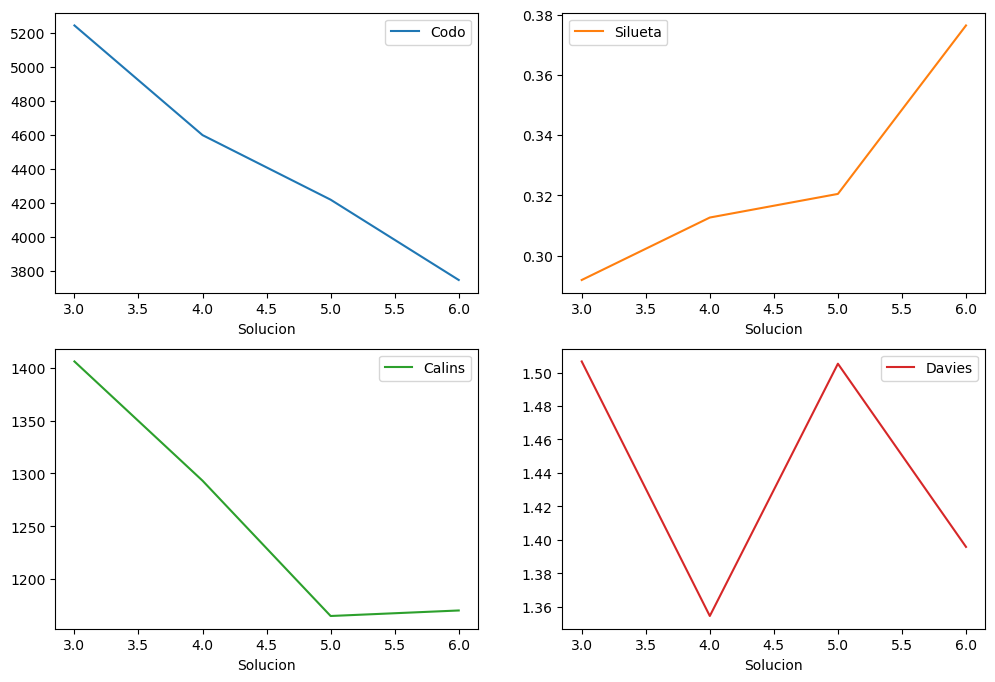

In [48]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

### Segmentación final con la mejor solucion

In [52]:
mejor_solucion = 6

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=6, n_init=10)

## EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### Calcular el segmento en entrenamiento y en validación

In [53]:
df['segmento'] = cluster.predict(df)

### Comparar los perfiles

## PERFILAR LOS SEGMENTOS

In [54]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3,4,5
origen_API,0.983696,0.000000,0.000000,0.000000,0.000000,0.858841
origen_Landing Page Submission,0.000000,0.938645,0.854749,0.970684,1.000000,0.000000
origen_Lead Add Form,0.007609,0.056777,0.139665,0.014115,0.000000,0.136701
origen_OTROS,0.008696,0.004579,0.005587,0.015201,0.000000,0.004458
ult_actividad_Chat Conversation,0.178261,0.000000,0.000000,0.000000,0.085202,0.056464
ult_actividad_Converted to Lead,0.111957,0.000000,0.000000,0.000000,0.269058,0.016345
ult_actividad_Email Link Clicked,0.050000,0.000000,0.000000,0.000000,0.110613,0.034175
ult_actividad_Email Opened,0.395652,0.000000,1.000000,1.000000,0.000000,0.309064
ult_actividad_OTROS,0.050000,0.000000,0.000000,0.000000,0.159940,0.124814
ult_actividad_Page Visited on Website,0.089130,0.000000,0.000000,0.000000,0.375187,0.053492


In [55]:
df.segmento.value_counts(normalize=True)

segmento
1   0.23
3   0.19
0   0.19
5   0.14
4   0.14
2   0.11
Name: proportion, dtype: float64